# SyriaTel Customer Churn Analysis 

## Overview

SyriaTel is a telecommunications company in Syria. They have been informed that some of their customers have started to churn, discontinue their service. This analysis will determine what features will indicate if a customer will discontinue their service.

## <small> Business Understanding</small>

### <small> Introduction</small>

In the dynamic realm of telecommunications, Syria Tel grapples with the pervasive challenge of customer churn. This project represents a concerted effort to decode the intricate patterns and drivers behind customer attrition within Syria Tel's subscriber base. By harnessing advanced machine learning methodologies, the aim is to discern critical indicators and behavioral trends leading to customer churn.

The core objective revolves around constructing a predictive model adept at foreseeing potential churn instances, equipping Syria Tel with actionable insights to preemptively engage and retain customers. Beyond prediction, the project endeavors to furnish actionable strategies, empowering Syria Tel's stakeholders with data-driven interventions to refine service quality, foster enduring customer relationships, and fortify the company's competitive stance in the telecommunications landscape. Through this exploration, we endeavor to shed light on the enigmatic facets of customer churn, enabling Syria Tel to pivot towards proactive customer retention strategies and sustained growth.

### <small>  Problem Statement</small>

Syria Tel, a prominent telecom company, grapples with a pressing issue—customer churn. This means customers are stopping their services with Syria Tel, affecting the company's stability and income. The problem lies in predicting when customers might leave and understanding why they choose to do so. Syria Tel wants to prevent this from happening and keep their customers satisfied.

### <small> Main Objective</small>

To apply classification modeling techniques to analyze customer churn data for Syria Tel, aiming to identify and quantify the influential factors contributing to customer attrition. This analysis will enable stakeholders to make data-informed decisions regarding customer retention strategies and optimize efforts to minimize churn in the telecom industry.

### <small> Subjective Objectives</small>

1. Explore the Data for Classification
Explore the dataset to understand the relationships between different variables and the target variable (customer churn). Identify relevant features that may influence churn, considering categorical and numerical variables.

2. Create a Classification Model for Churn Prediction
Build a classification model (such as Logistic Regression, Random Forest, or XGBoost) to predict customer churn. Choose appropriate independent variables (features) that are likely to impact churn, considering factors like international plan usage, call minutes and customer service calls>

3. Analyze Feature Importance and Effects
Analyze the importance of independent features in predicting churn. Identify the most influential factors affecting churn prediction based on the model's coefficients, feature importance scores, or other relevant metrics.

4. Assess Model Performance and Reliability
Evaluate the classification model's performance through metrics like accuracy, precision, recall, and confusion matrix. Ensure the model is reliable and accurately predicts customer churn by testing.

5. Offer Practical Insights and Recommendations
Provide actionable insights and recommendations based on the classification model's findings. Offer guidance to telecom companies on factors influencing customer churn. Highlight influential features and their impact on churn, enabling better decision-making for retaining customers, optimizing service plans, or improving customer service.


### <small>  Data Understanding</small>

The dataset has the following columns:

state: the state the customer lives in

account length: the number of days the customer has had an account

area code: the area code of the customer

phone number: the phone number of the customer

international plan: true if the customer has the international plan, otherwise false

voice mail plan: true if the customer has the voice mail plan, otherwise false

number vmail messages: the number of voicemails the customer has sent

total day minutes: total number of minutes the customer has been in calls during the day

total day calls: total number of calls the user has done during the day

total day charge: total amount of money the customer was charged by the Telecom company for calls during the day

total eve minutes: total number of minutes the customer has been in calls during the evening

total eve calls: total number of calls the customer has done during the evening

total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening

total night minutes: total number of minutes the customer has been in calls during the night

total night calls: total number of calls the customer has done during the night

total night charge: total amount of money the customer was charged by the Telecom company for calls during the night

total intl minutes: total number of minutes the user has been in international calls

total intl calls: total number of international calls the customer has done

total intl charge: total amount of money the customer was charged by the Telecom company for international calls

customer service calls: number of calls the customer has made to customer service

churn: true if the customer terminated their contract, otherwise false

##  Reading the data

In [3]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations and array manipulation
import matplotlib.pyplot as plt #Data Visualisation
%matplotlib inline
import ydata_profiling # For summary of the data
import warnings
# Visualize in the notebook

import seaborn as sns # for enhanced visualisation
from sklearn.model_selection import train_test_split #for splitting our data into training and testing sets
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics # For model evaluation and performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

In [4]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\espym.LAPTOP-41F90NSA\projects\Phase_3_project\Tel-Customer-Churn\Data\archive\bigml_59c28831336c6604c800002a.csv")
# Preview the shape of the dataset
print('Dataframe shape {}'.format(df.shape))

Dataframe shape (3333, 21)


# Data Exploration

In [5]:
#  Creating a class for exploring and analyzing Pandas DataFrames.
class DataExplorer:
    def __init__(self, data):
        """
        Initialize the DataExplorer class with a dataset.
        :param data: Pandas DataFrame
        """
        self.data = data
        
    def check_head(self, rows=5):
        """
        Display the first few rows of the dataset.
        :param rows: Number of rows to display (default is 5)
        :return: Pandas DataFrame showing the head of the dataset
        """
        return self.data.head(rows)
    
    def check_info(self):
        """
        Display information about the dataset (data types, memory usage, etc.).
        """
        return self.data.info()
    
    def check_describe(self):
        """
        Generate descriptive statistics of the dataset (count, mean, etc.).
        :return: Pandas DataFrame with descriptive statistics
        """
        return self.data.describe()
    

In [6]:
# Instatiating the class
explorer = DataExplorer(df)

# Check the head of the dataset
print("Head of the dataset:")
print(explorer.check_head())

# Check dataset info
print("\nDataset info:")
explorer.check_info()

# Check dataset description
print("\nDataset statistics:")
print(explorer.check_describe())


Head of the dataset:
  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             

In [7]:
# Summary statistics for categorical columns in DataFrame 'df'
df.describe(include='O')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,375-3658,no,no
freq,106,1,3010,2411


# Data Cleaning

Data Prep
This section prepares the data for EDA and modeling. The dataset will be checked for:

duplicated rows
missing values
irrelevant columns as they may not add to the analysis

In [8]:
# Checking for null values
pd.DataFrame(df.isnull().sum()).T

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Checking for duplicate Values
df.duplicated().sum()

0

The data has no missing or duplicate values

In [10]:
# Dropping unwanted columns
# We drop the phone number columns as it hold no relevance to this analysis its just a customers number
df.drop(['phone number'], inplace=True, axis=1)

# Explarotary Data Analysis

### Univariate Analysis

The dataset has both numerical and categorical variables and we shall explore them separately

## 1. Categorical Variables

In [11]:
# extract the categorical variables in the dataset
categorical = [ cat for cat in df.columns if df[cat].dtypes=='O']
print('List of categorical variables {}'.format(categorical))

List of categorical variables ['state', 'international plan', 'voice mail plan']


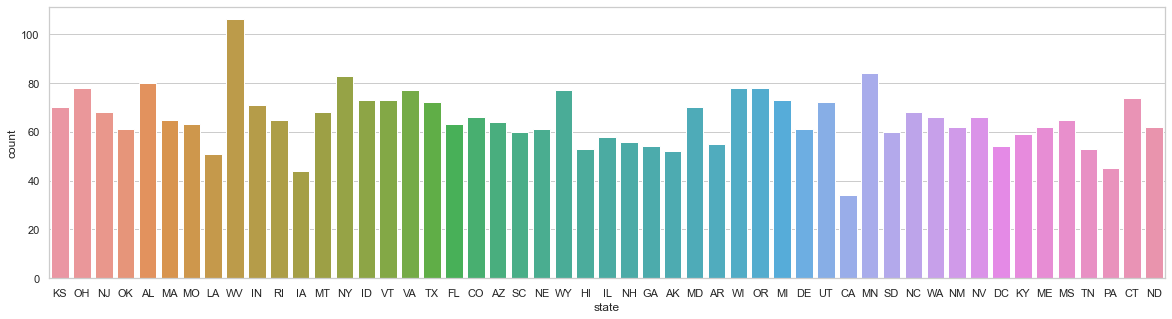

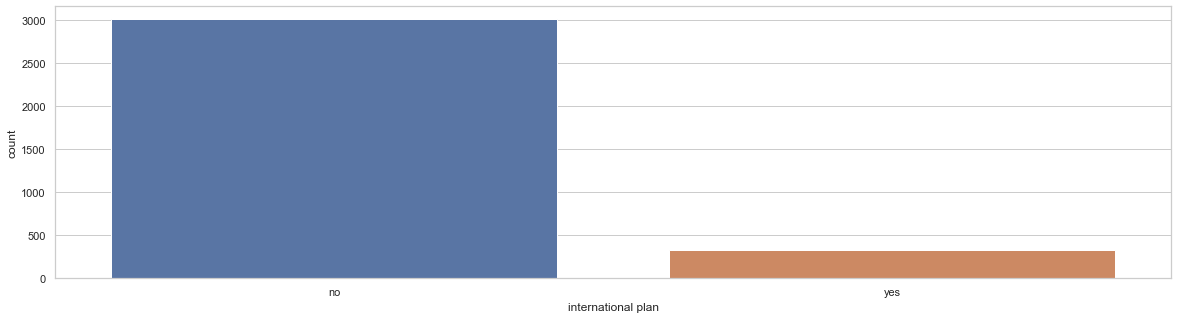

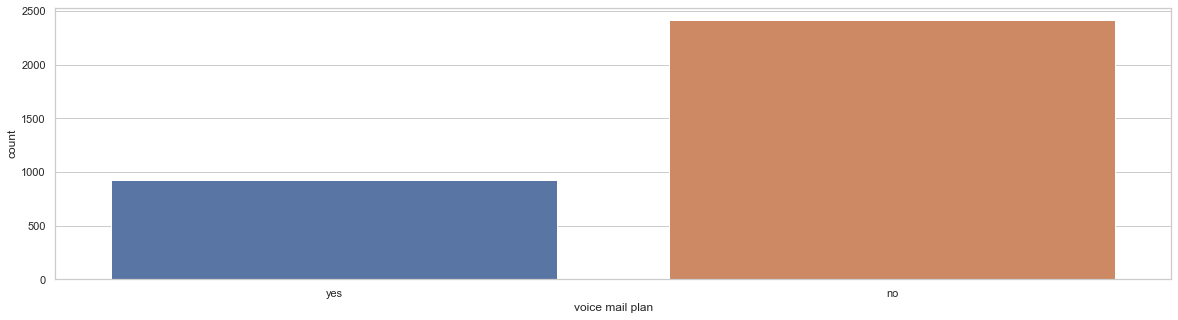

In [12]:
# plotting all the categorical variable 
for feature in categorical:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(df)
    ax = sns.countplot(x = df[feature], data = df)
    plt.show()

False    2850
True      483
Name: churn, dtype: int64


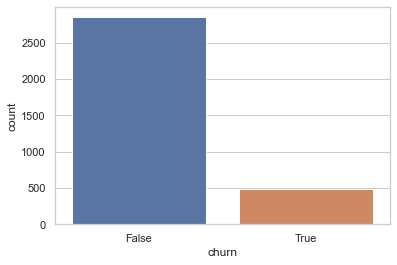

In [13]:
# Plotting the distribution of  the target variable - churn
print(df['churn'].value_counts())
sns.countplot(data=df,x='churn')
plt.show()

## Checking Outliers

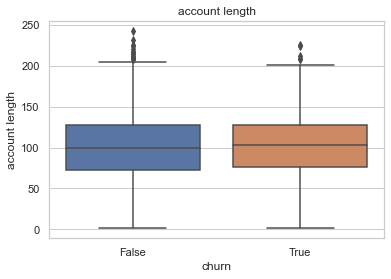

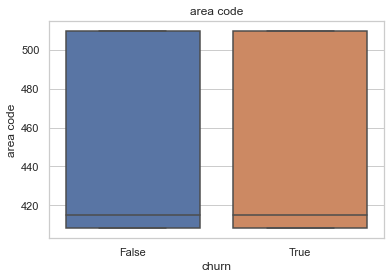

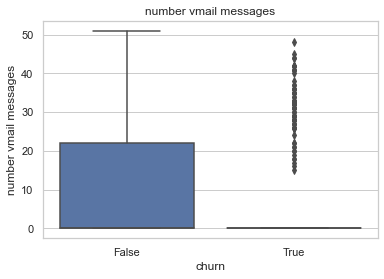

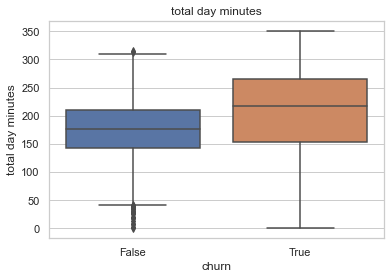

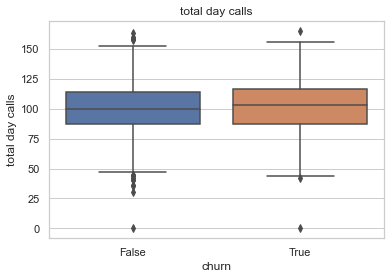

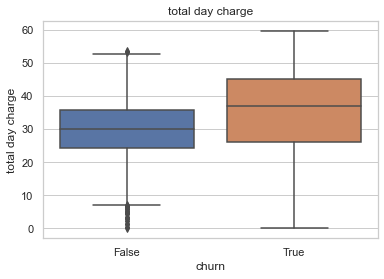

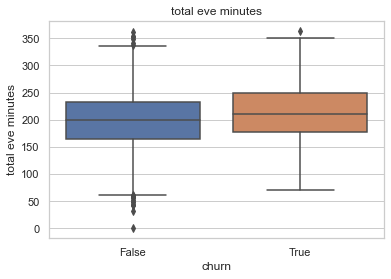

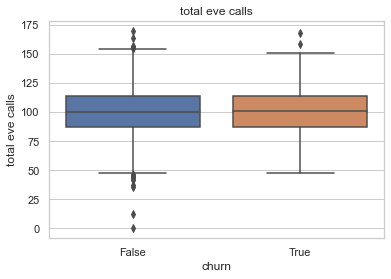

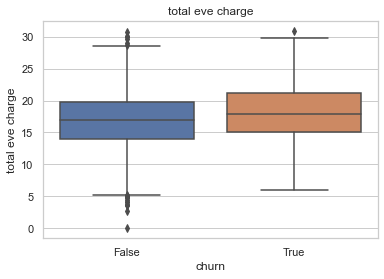

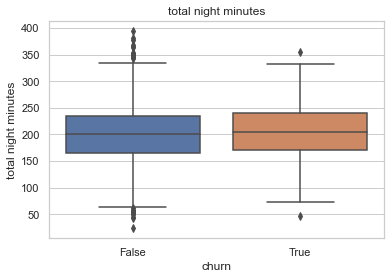

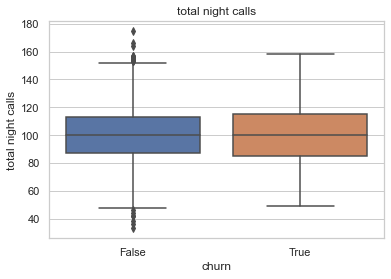

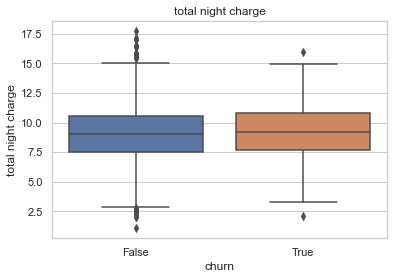

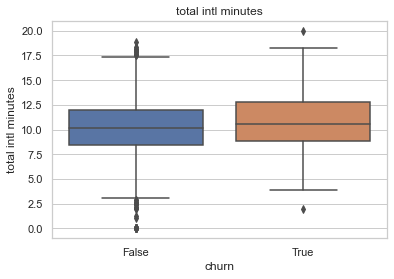

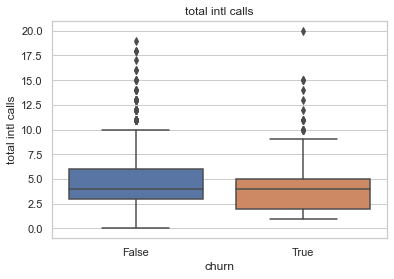

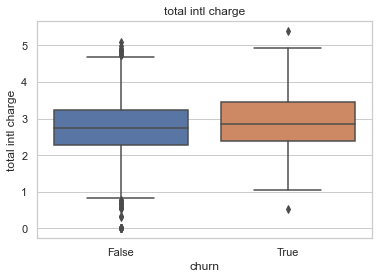

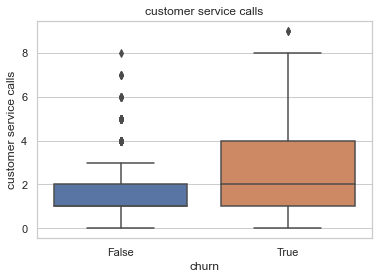

In [14]:
numerical_variables = [
    'account length', 'area code', 'number vmail messages', 'total day minutes',
    'total day calls', 'total day charge', 'total eve minutes', 'total eve calls',
    'total eve charge', 'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls'
]
for feature in numerical_variables:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = df)
        plt.title(feature)
        plt.show()

In [15]:
class OutlierRemover:
    def __init__(self):
        pass
    
    def remove_outliers(self, train, labels):
        for label in labels:
            q1 = train[label].quantile(0.25)
            q3 = train[label].quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + 1.5 * iqr
            lower_bound = q1 - 1.5 * iqr
            train[label] = train[label].mask(train[label] < lower_bound, train[label].median(), axis=0)
            train[label] = train[label].mask(train[label] > upper_bound, train[label].median(), axis=0)

        return train

# Example usage:
# Instantiate the OutlierRemover class
outlier_handler = OutlierRemover()

cleaned_data = outlier_handler.remove_outliers(df, numerical_variables)


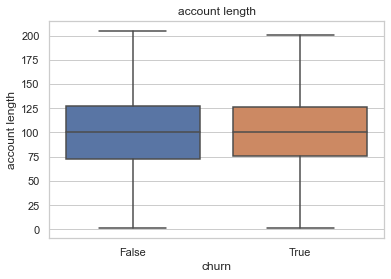

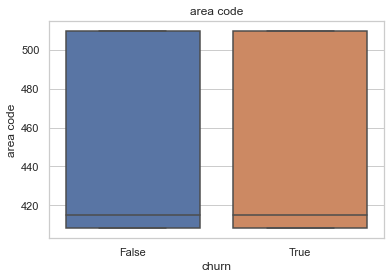

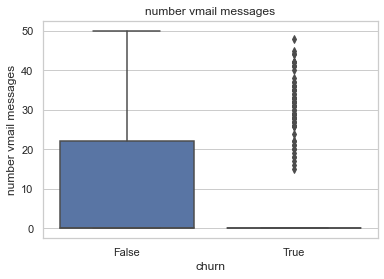

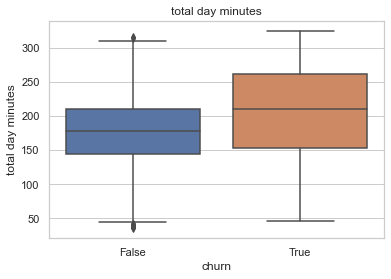

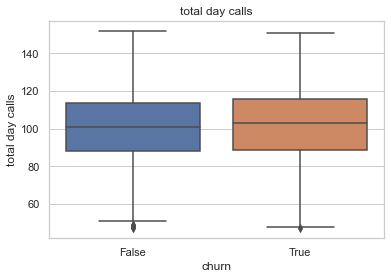

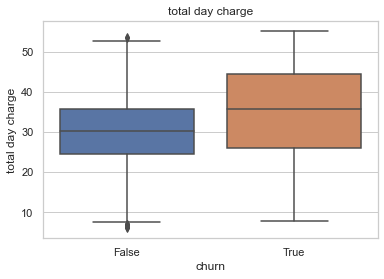

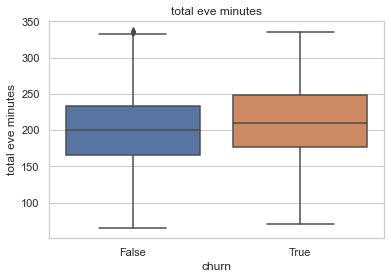

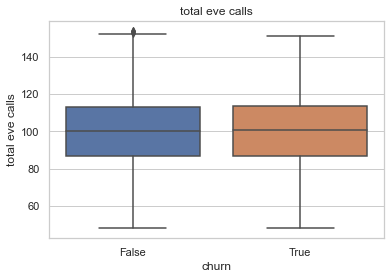

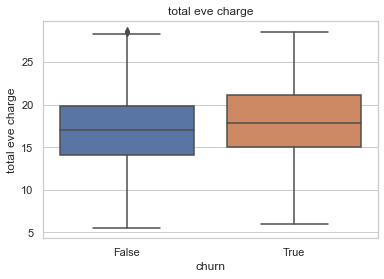

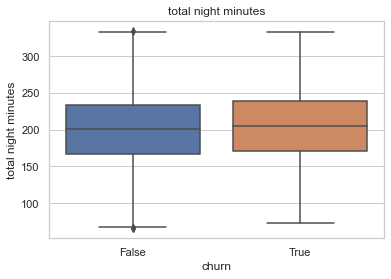

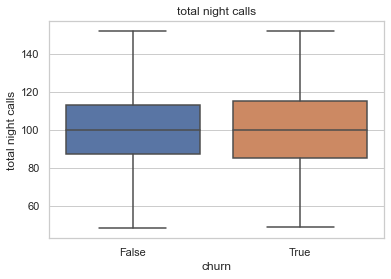

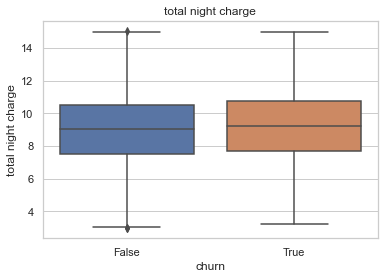

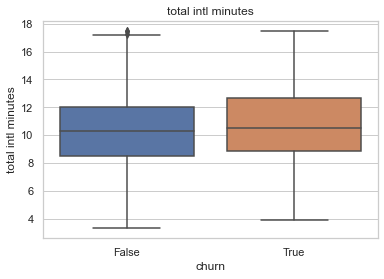

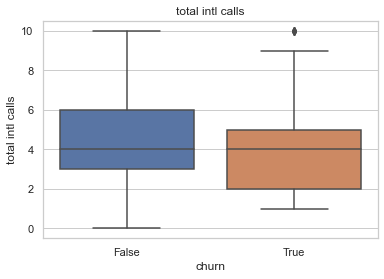

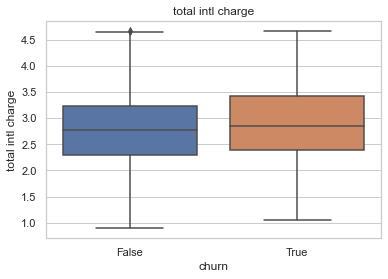

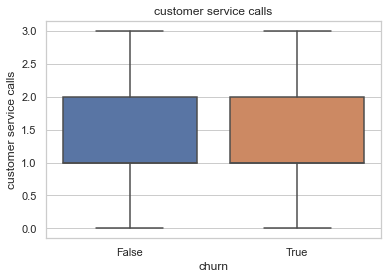

In [16]:
# Plotting to check removal of outliers
for feature in numerical_variables:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = df)
        plt.title(feature)
        plt.show()

## 2. Numerical Variables

In [17]:
# Extracting the numerical variables from the data
# extract the categorical variables in the dataset
categorical = [ cat for cat in df.columns if df[cat].dtypes !='O']
print('List of categorical variables {}'.format(categorical))

List of categorical variables ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


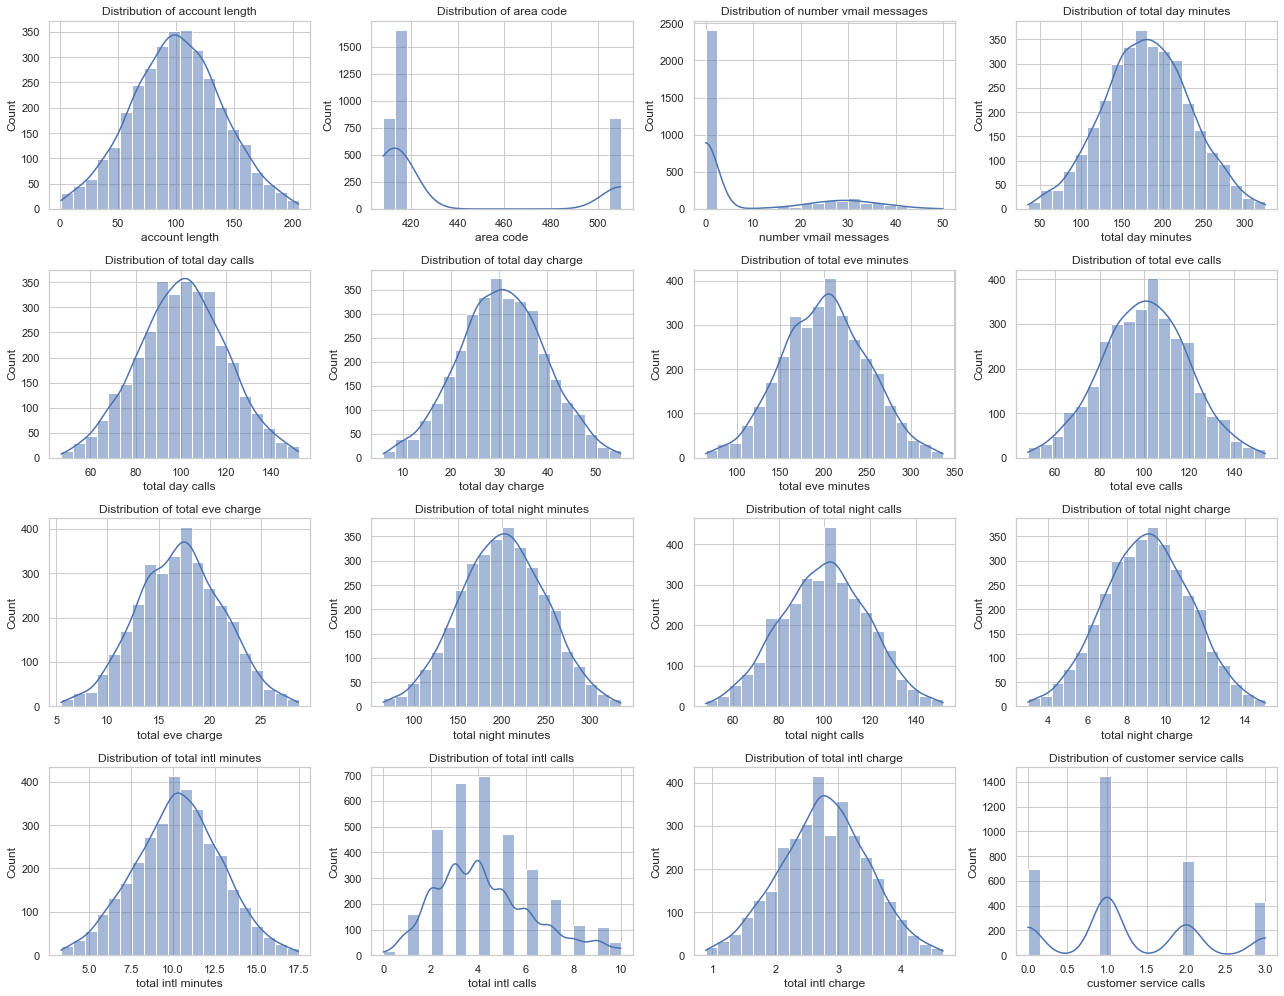

In [18]:
# Define the number of rows and columns for subplots
rows = 4  # Number of rows for subplots
cols = 4  # Number of columns for subplots

fig, axes = plt.subplots(rows, cols, figsize=(18, 14))
axes = axes.ravel()  # Flatten the 2D array of subplots into a 1D array

for i, column in enumerate(numerical_variables):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Hide empty subplots if the number of variables is less than rows * columns
for i in range(len(numerical_variables), rows * cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

From the above plots it is evident that all but customer service calls,area code and voice mail messages have a normal distribution. Total international calls seems like a normal distribution however skewed to the right.

# BiVariate Analysis

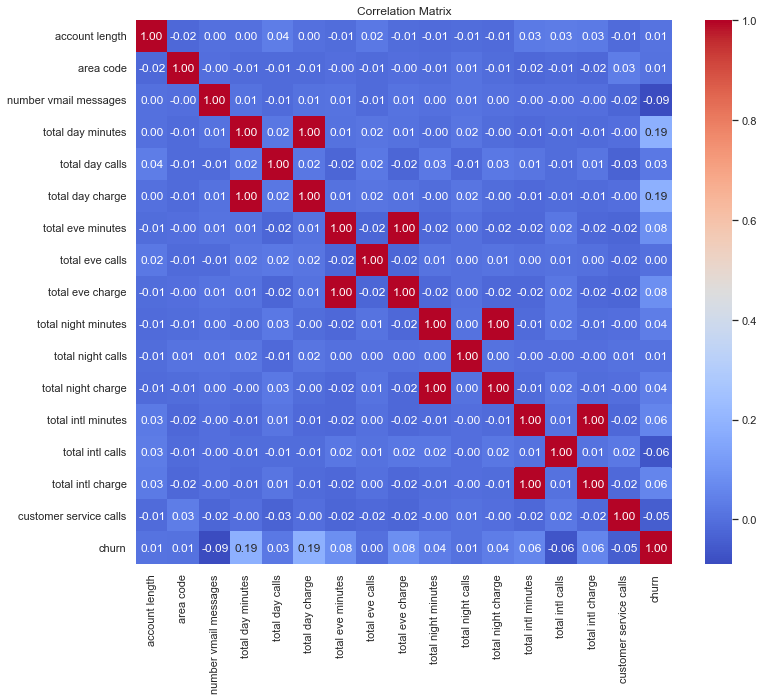

In [19]:
# Plotting a correlation matrix to check for correlation between the variables
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Several features exhibit a perfect positive correlation, notably:

Total day charge and total day minutes

Total eve charge and total eve minutes

Total night charge and total night minutes

Total int charge and total int minutes

These perfect correlations are logical as the charge is a direct consequence of the minutes used.

## Data Preprocessing

In [20]:
# We take a preview of the unique values in the churn column - Target variable
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [21]:
# Convert the churn values to 0 and 1
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 
# Previewing the changes
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,201.4,88,17.12,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [22]:
# # Converting yes and no from columns to 0 and 1 
# Mapping dictionary
yes_no_to_binary = {'no': 0, 'yes': 1}

# Applying mapping to 'international plan' and 'voice mail plan'
df['international plan'] = df['international plan'].map(yes_no_to_binary)
df['voice mail plan'] = df['voice mail plan'].map(yes_no_to_binary)

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,201.4,88,17.12,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [24]:
# Encoding the state column
# We use hashing encoder as the states are 51 and we want a minimal number of rows
import category_encoders as ce

hash_encoder = ce.HashingEncoder(cols='state')

df = hash_encoder.fit_transform(df)


In [25]:
# Scaling the numerical columns
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)

df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account length,area code,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.622549,0.068627,...,0.481132,0.487921,0.665428,0.413462,0.665289,0.471831,0.3,0.478836,0.333333,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.519608,0.068627,...,0.518868,0.481018,0.701487,0.528846,0.701653,0.732394,0.3,0.743386,0.333333,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.068627,...,0.584906,0.208369,0.360223,0.538462,0.360331,0.626761,0.5,0.634921,0.000000,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.406863,0.000000,...,0.377358,0.502588,0.487732,0.394231,0.487603,0.232394,0.7,0.235450,0.666667,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.362745,0.068627,...,0.698113,0.308024,0.450558,0.701923,0.450413,0.478873,0.3,0.486772,1.000000,0.0


## Modelling

In [26]:
# Splitting the data
X = df.drop(['churn'],axis=1)
y = df['churn']
# We use 25% of the data on training and a random state of 42
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.25,random_state=42)

## Baseline Model

In [27]:
# We first begin by Logistic Regression as the baseline model
lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test) 

In [28]:
# Evaluating the baseline model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred_lr)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred_lr)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred_lr)))

Accuracy: 
0.8703481392557023
Classification report: 
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      2141
         1.0       0.68      0.18      0.29       358

    accuracy                           0.87      2499
   macro avg       0.78      0.58      0.61      2499
weighted avg       0.85      0.87      0.84      2499

Confusion Matrix
[[2110   31]
 [ 293   65]]


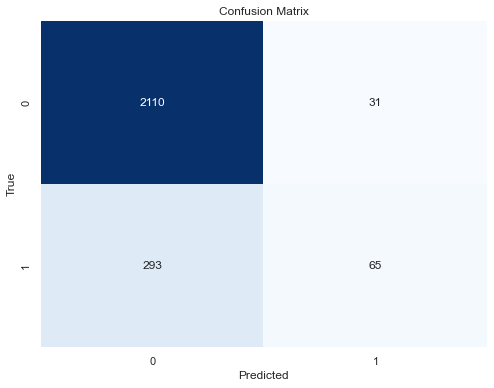

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy:
The accuracy of the model is 87.03%. This metric signifies the overall correctness of predictions made by the model. In this case, the model correctly predicted approximately 87 out of every 100 instances, which seems reasonably high at first glance.

Confusion Matrix:
The confusion matrix is a table that shows the model's performance in terms of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

True Positives (TP): 65 - These are instances where the model correctly predicted that customers would churn (actual churn: 1.0) out of the total actual churn instances.
True Negatives (TN): 2110 - These are instances where the model correctly predicted that customers wouldn't churn (actual non-churn: 0.0) out of the total actual non-churn instances.
False Positives (FP): 31 - These are instances where the model incorrectly predicted that customers would churn, but they actually didn't.
False Negatives (FN): 293 - These are instances where the model incorrectly predicted that customers wouldn't churn, but they actually did.

## Random Forest Classifier

In [30]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [31]:
# Evaluation of the random forest model
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred_rfc)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred_rfc)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred_rfc)))

Accuracy: 
0.8939575830332133
Classification report: 
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      2141
         1.0       0.84      0.32      0.46       358

    accuracy                           0.89      2499
   macro avg       0.87      0.66      0.70      2499
weighted avg       0.89      0.89      0.87      2499

Confusion Matrix
[[2119   22]
 [ 243  115]]


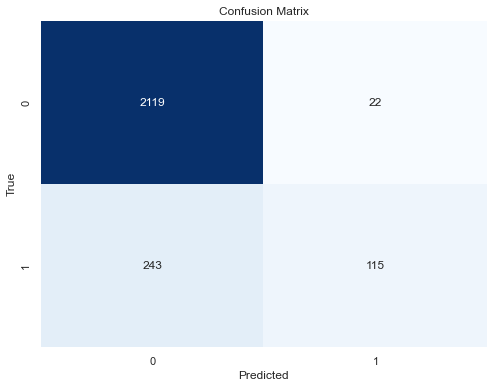

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred_rfc)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy:
The accuracy of the model is 89.40%. Similar to the previous case, this metric represents the overall correctness of predictions made by the model. It correctly predicted approximately 89 out of every 100 instances, showing a slightly higher accuracy compared to the previous model.

Confusion Matrix:
True Positives (TP): 115 - The model correctly predicted that customers would churn (actual churn: 1.0) out of the total actual churn instances.
True Negatives (TN): 2119 - It correctly predicted that customers wouldn't churn (actual non-churn: 0.0) out of the total actual non-churn instances.
False Positives (FP): 22 - The model incorrectly predicted that customers would churn, but they actually didn't.
False Negatives (FN): 243 - It incorrectly predicted that customers wouldn't churn, but they actually did.

In [33]:
# Tuning the Random Forest Classifier Model
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10, 15],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}
# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate model performance on test set
accuracy = best_estimator.score(X_test, y_test)


In [34]:
# Checking the evaluation metrics 
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8979591836734694


Interpretation:
Best Parameters Found: The best combination of parameters for your model that resulted in the highest accuracy on your training data are:
'max_depth': None (meaning no maximum depth for the trees was set)
'min_samples_split': 2 (the minimum number of samples required to split a node was set to 2)
'n_estimators': 200 (the number of trees in the forest was set to 200)

Accuracy Score on Test Data: 
After tuning the model with these parameters, it achieved an accuracy of approximately 89.80% on the test data. This means that the model correctly predicted almost 90 out of every 100 instances, showcasing improved performance compared to default settings or other parameter combinations.
In essence, by using GridSearchCV, you've found the best settings for your Random Forest Classifier that significantly improved its accuracy in predicting customer churn based on the provided data.

# Ensemble Method

## XGB Classifier

In [35]:
clf = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7, 
                        subsample=0.8, nthread=10, learning_rate=0.01)
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

# Checking for the evaluation metrics 
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred_clf)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred_clf)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred_clf)))

Accuracy: 
0.9123649459783914
Classification report: 
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      2141
         1.0       0.85      0.47      0.61       358

    accuracy                           0.91      2499
   macro avg       0.88      0.73      0.78      2499
weighted avg       0.91      0.91      0.90      2499

Confusion Matrix
[[2111   30]
 [ 189  169]]


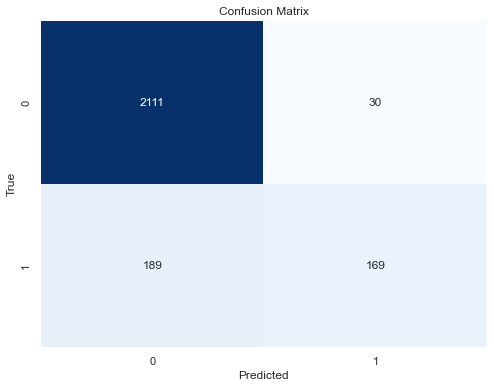

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred_clf)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy:
The accuracy of the model is 91.24%. This indicates the overall correctness of predictions made by the model. It correctly predicted approximately 91 out of every 100 instances, showcasing a higher accuracy compared to previous models.

Confusion Matrix:
True Positives (TP): 169 - The model correctly predicted that customers would churn (actual churn: 1.0) out of the total actual churn instances.
True Negatives (TN): 2111 - It correctly predicted that customers wouldn't churn (actual non-churn: 0.0) out of the total actual non-churn instances.
False Positives (FP): 30 - The model incorrectly predicted that customers would churn, but they actually didn't.
False Negatives (FN): 189 - It incorrectly predicted that customers wouldn't churn, but they actually did.

# Results

Heres an evaluation of all the models

### Logistic Regression:
- **Accuracy:** Around 87%
- **Precision for Churn:** 68%
- **Recall for Churn:** 18%
- **Findings:** The Logistic Regression model performs reasonably well in predicting non-churn instances but struggles to identify churn cases, as indicated by its low recall score. It's somewhat accurate but needs improvement in capturing churn instances effectively.

### Random Forest Classifier:
- **Accuracy:** Approximately 89%
- **Precision for Churn:** 84%
- **Recall for Churn:** 32%
- **Findings:** The Random Forest model shows improvement compared to Logistic Regression. It achieves better balance in precision and recall for churn. However, it still faces challenges in identifying churn cases effectively.

### XGBoost Classifier:
- **Accuracy:** Roughly 91%
- **Precision for Churn:** 85%
- **Recall for Churn:** 47%
- **Findings:** The XGBoost model demonstrates the highest accuracy among the three models and significantly improves identifying churn instances. While the balance between precision and recall is better, there's still room for enhancing the recall score for churn.

### Overall :
- **Best Model:** XGBoost Classifier
- **Reasoning:** XGBoost shows superior performance with the highest accuracy and better balance between precision and recall for predicting churn. It's more effective in identifying churn cases compared to Logistic Regression and Random Forest models.
- **Improvement Areas:** All models struggle with correctly identifying churn instances (low recall), indicating the need for further enhancements, perhaps through more data exploration, feature engineering, or exploring different modeling techniques to better capture churn behavior.

In summary, while all models show some predictive capability, XGBoost stands out as the most promising in predicting customer churn due to its higher accuracy and improved balance in recognizing churn cases. However, efforts are needed to further refine the models for better churn prediction, aiming to increase recall without compromising precision.

### Metric used:
For this classification problem, I opted to use classification as my metric. This is because of Simplicity. Accuracy is straightforward to understand. It represents the overall correctness of the model by measuring the ratio of correctly predicted instances to the total instances. Its simplicity makes it easy to communicate and interpret, especially in non-technical settings or when presenting findings to a broader audience.